## web scraping: BNK48
* web: https://www.akb48.co.jp/about/members?class=0

In [1]:
# conda install beautifulsoup4 lxml requests pillow
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
from PIL import Image # pillow package (Python Image Library)
import io
import re # regular expression

In [2]:
print(f'pandas version = {pd.__version__}')
print(f'bs4    version = {bs4.__version__}') # beautifulsoup4

pandas version = 2.1.4
bs4    version = 4.12.2


In [3]:
pd.Timestamp.today()

Timestamp('2024-05-17 14:28:05.582739')

In [33]:
# url='https://www.akb48.co.jp/about/members/'
url='https://www.akb48.co.jp/about/members?class=0'
r = requests.get(url)
r.text[:100]

'<!doctype html>\n<html lang="ja">\n\n<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# websi'

In [34]:
# conda install beautifulsoup4
# conda install lxml
# s = BeautifulSoup(r.text, 'html.parser')
s = BeautifulSoup(r.text, 'lxml')
type(s)

bs4.BeautifulSoup

In [35]:
sc = s.find_all('li', {'class': 'memberList'})
#or
sc = s.select('li.memberList')

In [36]:
len(sc)

35

In [37]:
print(sc[0].prettify())

<li class="memberList gridMem">
 <a class="clkBtn" href="/about/members/detail?mid=110">
  <figure class="ShapeR2 memberImg">
   <img alt="岩立 沙穂" src="https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100622.jpg"/>
  </figure>
  <div class="memberProf">
   <p class="name clrPink SubTitle fwBold">
    岩立 沙穂
   </p>
   <p class="enName enGothic clrPink MTxt">
    Saho Iwatate
   </p>
   <figure class="birthDayBlk MTxt">
    <svg viewbox="0 0 69 51">
     <use xlink:href="#iconBirth">
     </use>
    </svg>
    <figcaption class="MTxt fwBold clrPink">
     1994.10.04
    </figcaption>
   </figure>
   <p class="team clrPink MTxt fwBold">
    <span class="teamName">
     13期生
    </span>
   </p>
  </div>
 </a>
</li>



In [39]:
print(sc[1].find('a').find('img')['src'])

https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100632.jpg


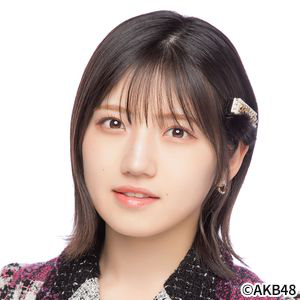

In [40]:
r1=requests.get(sc[1].find('a').find('img')['src'])
img = Image.open(io.BytesIO(r1.content))
img

In [41]:
sc[0]

<li class="memberList gridMem">
<a class="clkBtn" href="/about/members/detail?mid=110">
<figure class="ShapeR2 memberImg"><img alt="岩立 沙穂" src="https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100622.jpg"/></figure>
<div class="memberProf">
<p class="name clrPink SubTitle fwBold">岩立 沙穂</p>
<p class="enName enGothic clrPink MTxt">Saho Iwatate</p>
<figure class="birthDayBlk MTxt">
<svg viewbox="0 0 69 51">
<use xlink:href="#iconBirth"></use>
</svg>
<figcaption class="MTxt fwBold clrPink">1994.10.04</figcaption>
</figure>
<p class="team clrPink MTxt fwBold"><span class="teamName">13期生</span></p>
</div>
</a>
</li>

In [45]:
sc[0].find('p', {'class': 'enName'}).text

'Saho Iwatate'

In [47]:
sc[0].find('figcaption', {'class': 'MTxt'}).text

'1994.10.04'

In [80]:
sc[0].select_one("a")['href']

'/about/members/detail?mid=110'

In [48]:
def save_img(imgfilename: str, contents):
    with open(imgfilename, 'wb') as f:
        f.write(contents)

In [78]:
lst = []
for e in sc[:]:
    mem_link ="https://www.akb48.co.jp" + e.select_one("a")['href']
    mem_img_url=e.find('a').find('img')['src']
    mem_name=e.find('p', {'class': 'name'}).text
    mem_enname=e.find('p', {'class': 'enName'}).text
    dob=e.find('figcaption', {'class': 'MTxt'}).text
    dob=pd.to_datetime(dob).strftime('%Y-%m-%d')
    print(f'{mem_name} {mem_enname} {dob} {mem_img_url} {mem_link}')
    r=requests.get(mem_img_url)
    img = Image.open(io.BytesIO(r.content))
    lst.append([mem_name,mem_enname,dob,mem_img_url,mem_link])
    #ave_img(f'{mem_name}.jpg', r.content)
#     img.show()

岩立 沙穂 Saho Iwatate 1994-10-04 https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100622.jpg https://www.akb48.co.jp/about/members/detail?mid=110
村山 彩希 Yuiri Murayama 1997-06-15 https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100632.jpg https://www.akb48.co.jp/about/members/detail?mid=102
込山 榛香 Haruka Komiyama 1998-09-12 https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100787.jpg https://www.akb48.co.jp/about/members/detail?mid=149
谷口 めぐ Megu Taniguchi 1998-11-12 https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100852.jpg https://www.akb48.co.jp/about/members/detail?mid=216
福岡 聖菜 Seina Fukuoka 2000-08-01 https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100790.jpg https://www.akb48.co.jp/about/members/detail?mid=152
向井地 美音 Mion Mukaichi 1998-01-29 https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100791.jpg https://www.akb48.co.jp/about/members/detail?mid=153
小栗 有以 Yui Oguri 2001-12-26 https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100816.jpg https://www.akb48

# Create DataFrame

In [81]:
lst

[['岩立 沙穂',
  'Saho Iwatate',
  '1994-10-04',
  'https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100622.jpg',
  'https://www.akb48.co.jp/about/members/detail?mid=110'],
 ['村山 彩希',
  'Yuiri Murayama',
  '1997-06-15',
  'https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100632.jpg',
  'https://www.akb48.co.jp/about/members/detail?mid=102'],
 ['込山 榛香',
  'Haruka Komiyama',
  '1998-09-12',
  'https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100787.jpg',
  'https://www.akb48.co.jp/about/members/detail?mid=149'],
 ['谷口 めぐ',
  'Megu Taniguchi',
  '1998-11-12',
  'https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100852.jpg',
  'https://www.akb48.co.jp/about/members/detail?mid=216'],
 ['福岡 聖菜',
  'Seina Fukuoka',
  '2000-08-01',
  'https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100790.jpg',
  'https://www.akb48.co.jp/about/members/detail?mid=152'],
 ['向井地 美音',
  'Mion Mukaichi',
  '1998-01-29',
  'https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100791.jpg',
  'https://

In [85]:
df = pd.DataFrame(lst,columns = ['Name','Engname','DOB','img_url','link'])
df

,Name,Engname,DOB,img_url,link
0,岩立 沙穂,Saho Iwatate,1994-10-04,https://d2r1lkk9i7row.cloudfront.net/mobile/me...,https://www.akb48.co.jp/about/members/detail?m...
1,村山 彩希,Yuiri Murayama,1997-06-15,https://d2r1lkk9i7row.cloudfront.net/mobile/me...,https://www.akb48.co.jp/about/members/detail?m...
2,込山 榛香,Haruka Komiyama,1998-09-12,https://d2r1lkk9i7row.cloudfront.net/mobile/me...,https://www.akb48.co.jp/about/members/detail?m...
3,谷口 めぐ,Megu Taniguchi,1998-11-12,https://d2r1lkk9i7row.cloudfront.net/mobile/me...,https://www.akb48.co.jp/about/members/detail?m...
4,福岡 聖菜,Seina Fukuoka,2000-08-01,https://d2r1lkk9i7row.cloudfront.net/mobile/me...,https://www.akb48.co.jp/about/members/detail?m...
5,向井地 美音,Mion Mukaichi,1998-01-29,https://d2r1lkk9i7row.cloudfront.net/mobile/me...,https://www.akb48.co.jp/about/members/detail?m...
6,小栗 有以,Yui Oguri,2001-12-26,https://d2r1lkk9i7row.cloudfront.net/mobile/me...,https://www.akb48.co.jp/about/members/detail?m...
7,行天 優莉奈,Yurina Gyoten,1999-03-14,https://d2r1lkk9i7row.cloudfront.net/mobile/me...,https://www.akb48.co.jp/about/members/detail?m...
8,倉野尾 成美,Narumi Kuranoo,2000-11-08,https://d2r1lkk9i7row.cloudfront.net/mobile/me...,https://www.akb48.co.jp/about/members/detail?m...
9,坂川 陽香,Hiyuka Sakagawa,2006-10-07,https://d2r1lkk9i7row.cloudfront.net/mobile/me...,https://www.akb48.co.jp/about/members/detail?m...


In [83]:
from IPython.display import HTML
def to_html_img(url = None,alt=None,width = 100):
    return f'<img src="{url}" alt="{alt}" width="{width}"/>'
def to_html_a(url, text):
    if text==None:
        text=''
    return f'<a href="{url}">{text}</a>'

In [92]:
df['img'] = df.apply(lambda r : to_html_img(r['img_url'],r['Name']),axis=1)
df['Profile'] = df.apply(lambda r : to_html_a(r['link'],r['Name']),axis=1)

In [93]:
df.loc[1]

Name                                                   村山 彩希
Engname                                       Yuiri Murayama
DOB                                               1997-06-15
img_url    https://d2r1lkk9i7row.cloudfront.net/mobile/me...
link       https://www.akb48.co.jp/about/members/detail?m...
img        <img src="https://d2r1lkk9i7row.cloudfront.net...
a          <a href="https://www.akb48.co.jp/about/members...
Profile    <a href="https://www.akb48.co.jp/about/members...
Name: 1, dtype: object

In [64]:
df.iloc[1]['img']

'<img src="https://d2r1lkk9i7row.cloudfront.net/mobile/member/83100632.jpg" alt="村山 彩希" width="100"/>'

In [95]:
HTML(df[:][['Name','DOB','Engname','Profile','img']].to_html(escape=False))

,Name,DOB,Engname,Profile,img
0,岩立 沙穂,1994-10-04,Saho Iwatate,岩立 沙穂,
1,村山 彩希,1997-06-15,Yuiri Murayama,村山 彩希,
2,込山 榛香,1998-09-12,Haruka Komiyama,込山 榛香,
3,谷口 めぐ,1998-11-12,Megu Taniguchi,谷口 めぐ,
4,福岡 聖菜,2000-08-01,Seina Fukuoka,福岡 聖菜,
5,向井地 美音,1998-01-29,Mion Mukaichi,向井地 美音,
6,小栗 有以,2001-12-26,Yui Oguri,小栗 有以,
7,行天 優莉奈,1999-03-14,Yurina Gyoten,行天 優莉奈,
8,倉野尾 成美,2000-11-08,Narumi Kuranoo,倉野尾 成美,
9,坂川 陽香,2006-10-07,Hiyuka Sakagawa,坂川 陽香,
